In [1]:
import sys
import csv
import numpy as np
import matplotlib.pyplot as plt

sys.path.insert(0, 'src')

from utils import plot_line, plot_bar
from k_discount import kDISCount

# $k$-DISCount demo

$k$-DISCount: Counting in Large Image Colections with Detector-based Importance Sampling.

This demo uses the detector counts and screened counts from [[1]](https://www.biorxiv.org/content/10.1101/2022.10.28.513761v1) for radar station KBUF 2010.

In [2]:
# Load ground-truth counts
with open('KBUF_2010_ground_truth_counts.csv', 'r') as file:
    f = list(csv.reader(file))[0]
    f = [float(i) for i in f]

# Load detector counts
with open('KBUF_2010_detector_counts.csv', 'r') as file:
    g = list(csv.reader(file))[0]
    g = [float(i) for i in g]

## Initialize estimator

In [3]:
# Create k-DISCount object
estimator = kDISCount(g) # create k-DISCount object

# Get samples from estimator
samples = estimator.sample(n=30) # Returns list with indices (in g) of samples to be screened.
                                 # Ideally these will go to a screening/verification UI.

# For this demo we will retrieve ground-truth from f
screened_samples = [f[i] for i in samples]

# Load screened samples to estimator
estimator.load(screened_samples)

### Define regions

In [4]:
# Single region with all elements (DISCount--total count)
regions1 = [[i for i, _ in enumerate(g)]] 

# len(g) regions of single elements (cumulative counts per day)
regions2 = [[j for j in range(i+1)] for i, _ in enumerate(g)] 

# Cumulative counts per quarter
regions3 = [[i for i in range(0,len(g)//4)], 
            [i for i in range(len(g)//4,len(g)//4*2)],
            [i for i in range(len(g)//4,len(g)//4*3)],
            [i for i in range(len(g)//4,len(g)//4*4)]]

### $k$-DISCount for total count (DISCount)

In [5]:
F_hat, CI = estimator.estimate(regions1)
_, CI_all = estimator.estimate(regions1, ci_all_samples=True)

print('Ground truth: %.3e'%sum(f))
print('Estimation: %.3e %s %.3e'%(F_hat[0],u'\u00B1',CI[0]))
print('Estimation (CI all samples)$): %.3e %s %.3e'%(F_hat[0],u'\u00B1',CI_all[0]))

Ground truth: 5.056e+05
Estimation: 4.255e+05 ± 1.852e+05
Estimation (CI all samples)$): 4.255e+05 ± 1.852e+05


### $k$-DISCount for cumulative counts per-day

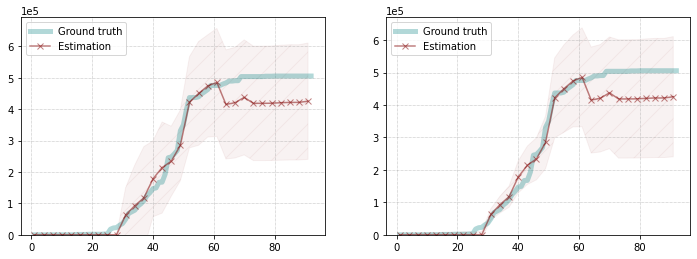

In [6]:
F_hat, CI = estimator.estimate(regions2)
_, CI_all = estimator.estimate(regions2, ci_all_samples=True)

plt.rcParams['figure.figsize'] = [12, 4]
plt.subplot(121)
plot_line(np.cumsum(f), F_hat, CI)
plt.subplot(122)
plot_line(np.cumsum(f), F_hat, CI_all)

### $k$-DISCount for cumulative counts per quarter

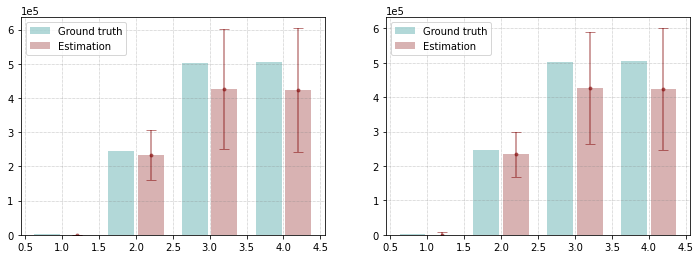

In [7]:
F_hat, CI = estimator.estimate(regions3)
_, CI_all = estimator.estimate(regions3, ci_all_samples=True)

F = [sum([f[i] for i in region]) for region in regions3]
plt.rcParams['figure.figsize'] = [12, 4]
plt.subplot(121)
plot_bar(F, F_hat, CI)
plt.subplot(122)
plot_bar(F, F_hat, CI_all)